It appears the data is spurious given the salaries don't seen to align with the titles. This is confirmed based on the details for my employee number, 499942.

In [47]:
#Import dependencies and create connection with database


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from config import un
from config import dbn
from config import pw
import psycopg2
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
conn = psycopg2.connect(user=un, password=pw, dbname=dbn)



In [70]:
#read in sql tables and merge dataframes

salaries = pd.read_sql("SELECT * FROM salaries", conn)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)
departments = pd.read_sql("SELECT * FROM departments", conn)
sal_emp = pd.merge(salaries, employees, on="emp_no", how="inner")
sal_emp = sal_emp.rename(columns = {'emp_title_id':'title_id' })
comb_titles = pd.merge(sal_emp, titles, on = "title_id", how="inner")
comb_dept_no = pd.merge(comb_titles, dept_emp, on = "emp_no", how="inner" )
comb_dept_mgr = pd.merge(comb_dept_no, dept_manager, on = "dept_no", how="inner")
comb_dept_mgr = comb_dept_mgr.rename(columns = {'emp_no_y':'manager_emp_no', 'emp_no_x': 'emp_no' })
df = pd.merge(comb_dept_no, departments, on = "dept_no", how="inner")

In [58]:
df

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title,dept_no,dept_name
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,d005,Development
1,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,d005,Development
2,10012,40000,e0003,1960-10-04,Patricio,Bridgland,M,1992-12-18,Senior Engineer,d005,Development
3,10018,55881,e0003,1954-06-19,Kazuhide,Peha,F,1987-04-03,Senior Engineer,d005,Development
4,10027,40000,e0003,1962-07-10,Divier,Reistad,F,1989-07-07,Senior Engineer,d005,Development
...,...,...,...,...,...,...,...,...,...,...,...
331598,499595,65268,s0002,1963-02-01,Nagui,Stamatiou,M,1988-11-17,Senior Staff,d002,Finance
331599,499853,57342,s0002,1961-11-30,Nalini,Schrift,F,1990-05-22,Senior Staff,d002,Finance
331600,499989,64183,s0002,1954-05-26,Keiichiro,Lindqvist,M,1993-10-28,Senior Staff,d002,Finance
331601,110085,60026,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager,d002,Finance


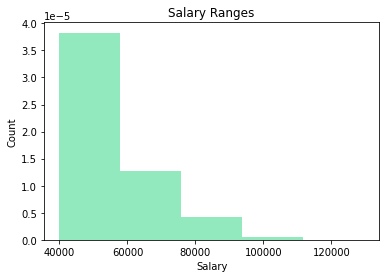

In [84]:
plt.hist(df.salary, density=True, bins=5, color = "#93e9be")  # density=False would make counts
plt.title('Salary Ranges')
plt.ylabel('Count')
plt.xlabel('Salary');

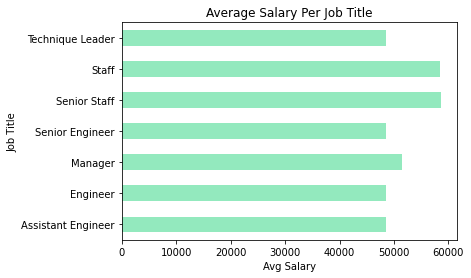

In [83]:
df_sal_by_title = df.groupby(["title"])['salary'].mean()
df_sal_by_title.plot(kind="barh", color="#93E9BE")
plt.ylabel('Job Title')
plt.xlabel('Avg Salary')
plt.title('Average Salary Per Job Title')
plt.show();


In [68]:
my_sal = df.loc[df['emp_no'] == 499942]

In [69]:
my_sal

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title,dept_no,dept_name
85704,499942,40000,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Technique Leader,d005,Development
